# Домашнее задание 5. Градиентный спуск. (10 баллов + 2 балла бонус)

В этом домашнем задании вы реализуете градиентный спуск для линейной регрессии, а также изучите, как он ведёт себя при разных параметрах и с разными функциями потерь.

Правила:

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания всем участникам нарушения будет выставлено 0 баллов, независимо от того, кто у кого списывал.

* Старайтесь сделать код максимально оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, рассмотренных в курсе.  

In [103]:
from typing import Iterable, List

import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — **Mean Squared Error (MSE)**:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов.

Чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его **не нужно**. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса.
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять градиент функции потерь по параметрам модели.

In [104]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число - значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`.

Он должен вычислять лосс и градиент по формулам наверху.

In [105]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return ((X @ w - y) ** 2).mean()

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return 2 * (X.T @ (X @ w - y)) / y.size

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [106]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^{t+1} = w^{t} - \eta \nabla_{w} Q(w^{t}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`.

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше, и возвращать
траекторию спуска (список из новых значений весов на каждом шаге).

In [107]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) - начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int --сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) - история весов на каждом шаге
    """
    descent_trajectory = [w_init]
    for _ in range(n_iterations):
        last_w = descent_trajectory[-1]
        w = last_w - lr * loss.calc_grad(X, y, last_w)
        descent_trajectory.append(w)
    return descent_trajectory


Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории.

In [108]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :] # разные масштабы признаков
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [109]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [110]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss, ax: Axes = None):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    if ax is None: ax = plt.gca()

    # ax.figure.set_size_inches(10, 15)
    # fig = ax.figure(figsize=(15, 6))
    ax.set_title("Траектори град. спуска")
    ax.set_xlabel(r"$w_1$")
    ax.set_ylabel(r"$w_2$")
    ax.set_xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    ax.set_ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    # ax.gca().set_aspect("equal")
    ax.set_aspect("equal")

    # Отображение уровня функции потерь
    CS = ax.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # Отображение траектории спуска
    ax.scatter(w_list[:, 0], w_list[:, 1])
    ax.plot(w_list[:, 0], w_list[:, 1])

    # plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте четыре и более различных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска.

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`.
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1.

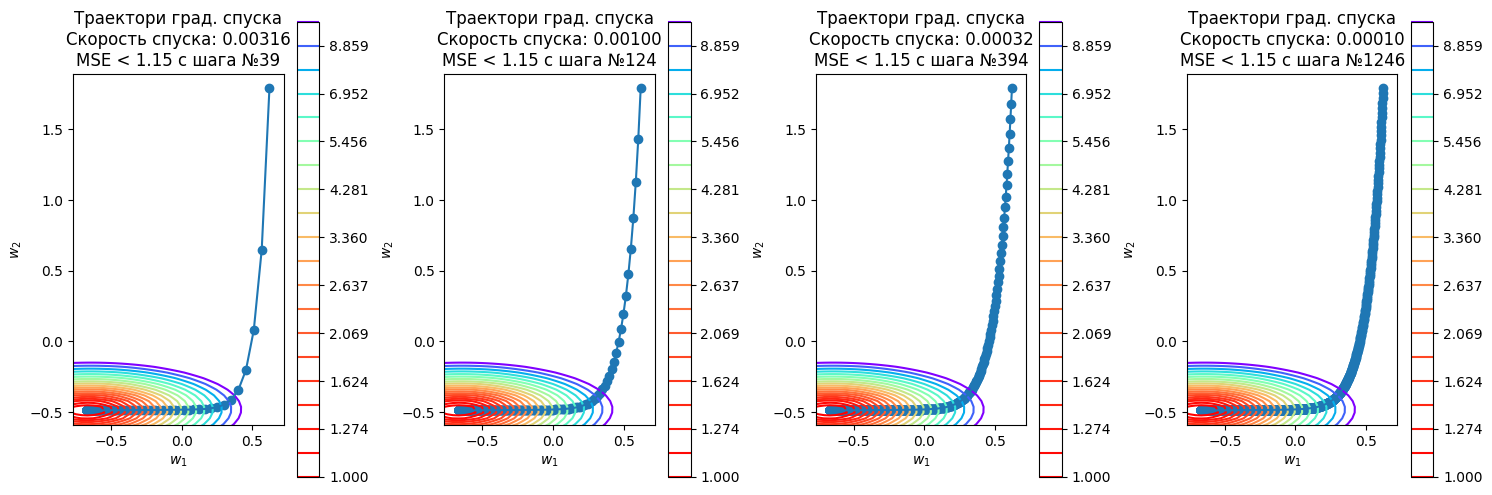

In [111]:
lr_options = [10 ** (p/2) for p in range(-5, -9, -1)]
# начиная с 0.01 числа вылетают за границы, overflow короче

superfig, axs = plt.subplots(1, 4, num=1, figsize=(15, 6))

axs: np.ndarray

for ax, lr in zip(axs.flatten(), lr_options):
    ax: Axes
    w_list = gradient_descent(w_init, X, y, loss, lr)
    for i, w in enumerate(w_list):
        if loss.calc_loss(X, y, w) < 1.15: break
    plot_gd(w_list, X, y, loss, ax=ax)
    ax.set_title(ax.get_title() + f"\nСкорость спуска: {lr:.5f}\nMSE < 1.15 с шага №{i}")
plt.tight_layout()
plt.show()

> Графики для разных длин шага выглядят примерно одинаково, но
> - Слишком большой шаг (≥0.01) вызывает градиентный взрыв, ошибки overflow и т.п.
> - Чем меньше шаг, тем позже мы прийдём в яму с низкой ошибкой

Теперь реализуем стохастический градиентный спуск.

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`.

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [112]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    descent_trajectory = [w_init]
    for _ in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        last_w = descent_trajectory[-1]
        w = last_w - lr * loss.calc_grad(batch, y[batch_indices], last_w)
        descent_trajectory.append(w)
    return descent_trajectory

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного? Что происходит при малых и больших `batch_size`?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

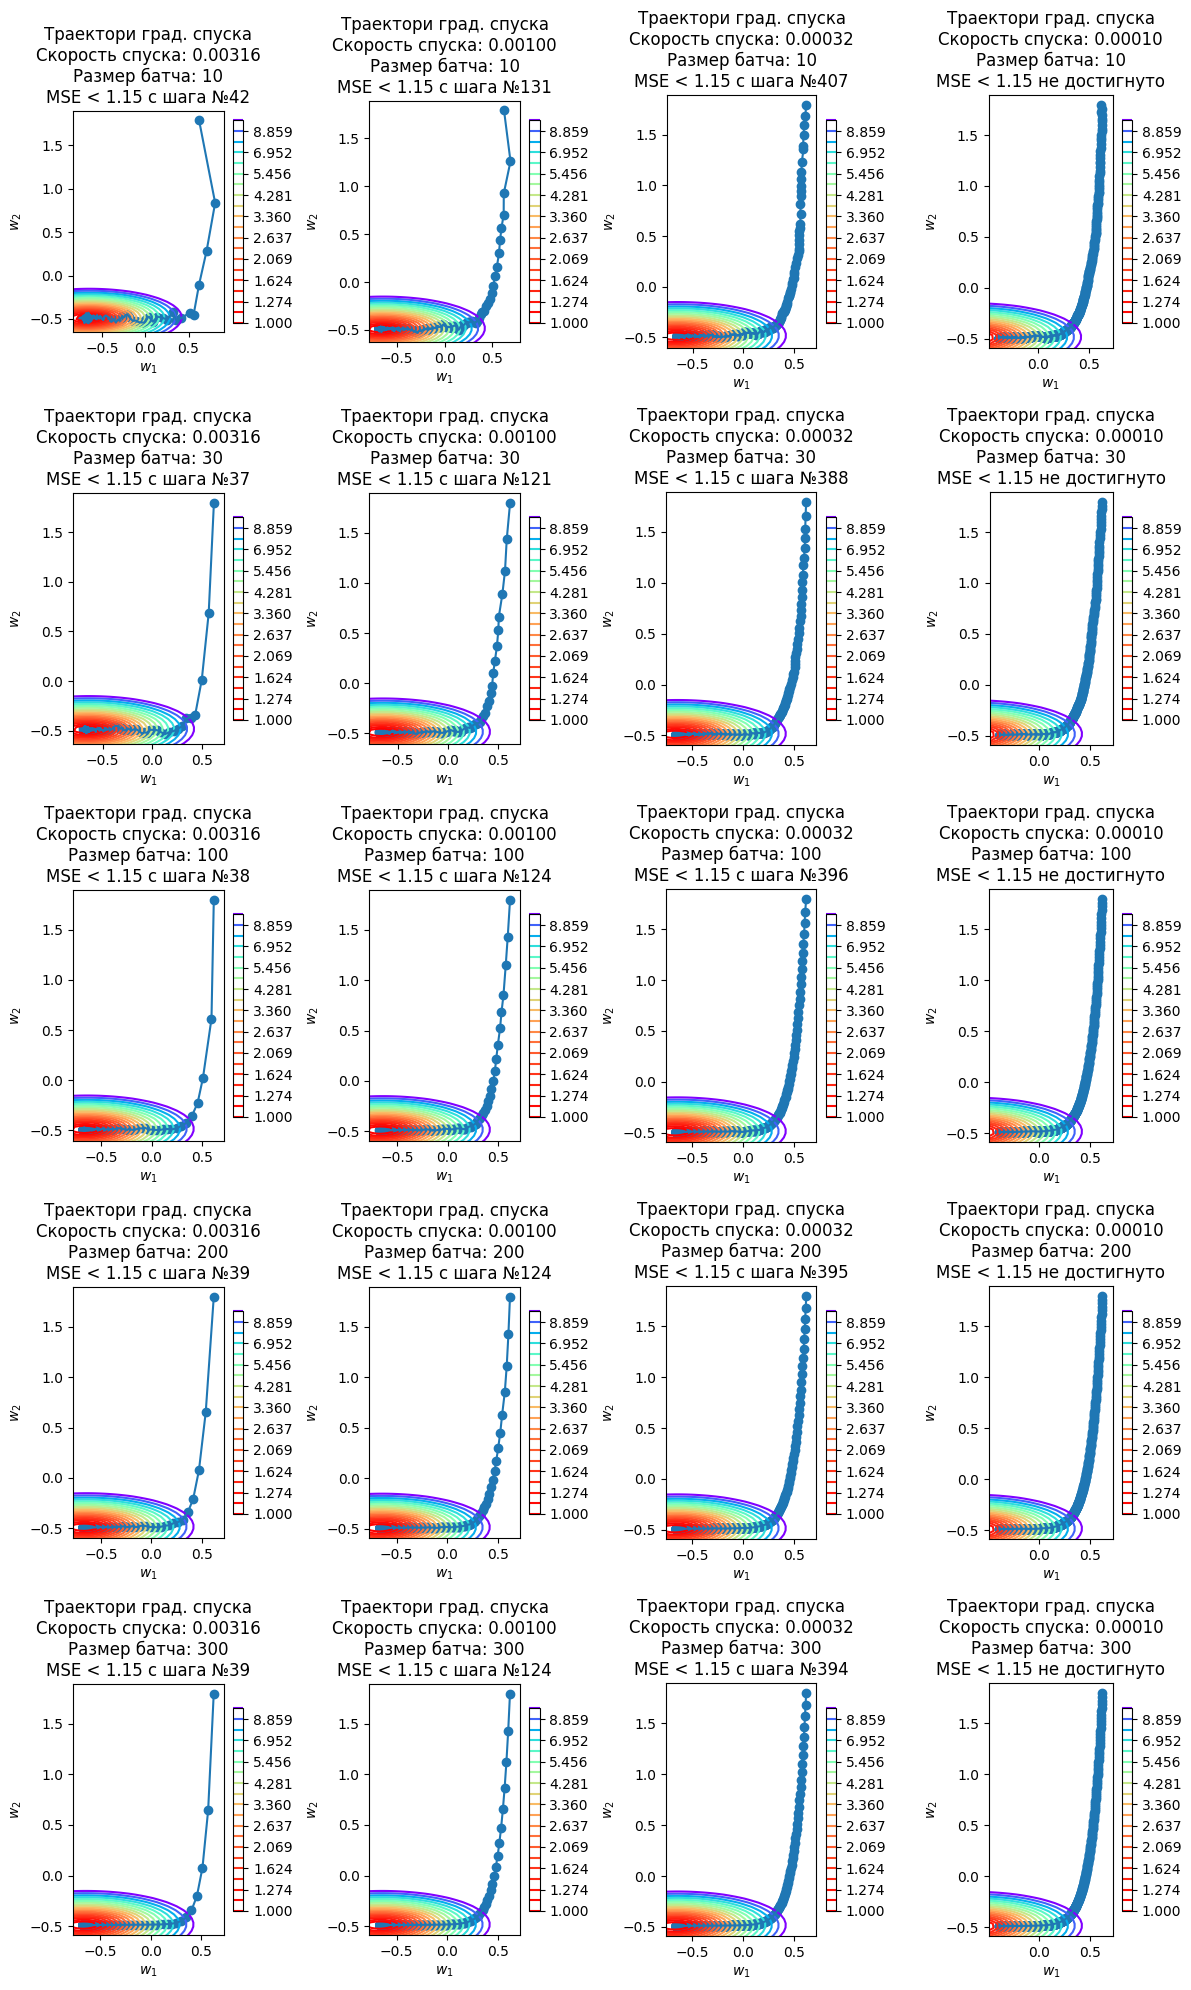

In [113]:
lr_options = [10 ** (p/2) for p in range(-5, -9, -1)]
# начиная с 0.01 числа вылетают за границы, overflow короче
batch_size_options = [10, 30, 100, 200, 300]

superfig, axs = plt.subplots(len(batch_size_options), len(lr_options), num=1, figsize=(3*len(lr_options), 4*len(batch_size_options)))

for axs_row, batch_size in zip(axs, batch_size_options):
    for ax, lr in zip(axs_row, lr_options):
        ax: Axes
        w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size)
        for i, w in enumerate(w_list):
            if loss.calc_loss(X, y, w) < 1.15: break
        else:
            i = -1
        plot_gd(w_list, X, y, loss, ax=ax)
        ax.set_title(
            ax.get_title()
            + f"\nСкорость спуска: {lr:.5f}\nРазмер батча: {batch_size}"
            + "\nMSE < 1.15" + (f" с шага №{i}" if i != -1 else " не достигнуто")
        )
plt.tight_layout()
plt.show()

> При меньших размерах батчей траектория получается кривее, но количество шагов для того, чтобы попасть в "яму", остаётся примерно тем же

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы точнее этого минимума достигнуть и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [118]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) - начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float - параметр величины шага, на который нужно домножать градиент
    :param batch_size: int - размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float - значение степени в формуле затухания длины шага
    :param n_iterations: int - сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) - история весов на каждом шаге
    """
    descent_trajectory = [w_init]
    np.random.seed(239)
    for i in range(1, n_iterations+1):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        last_w = descent_trajectory[-1]
        step = lr * (1 / (1 + i)) ** p
        w = last_w - step * loss.calc_grad(batch, y[batch_indices], last_w)
        descent_trajectory.append(w)
    return descent_trajectory

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска. Что происходит при маленьком или большом значении p?

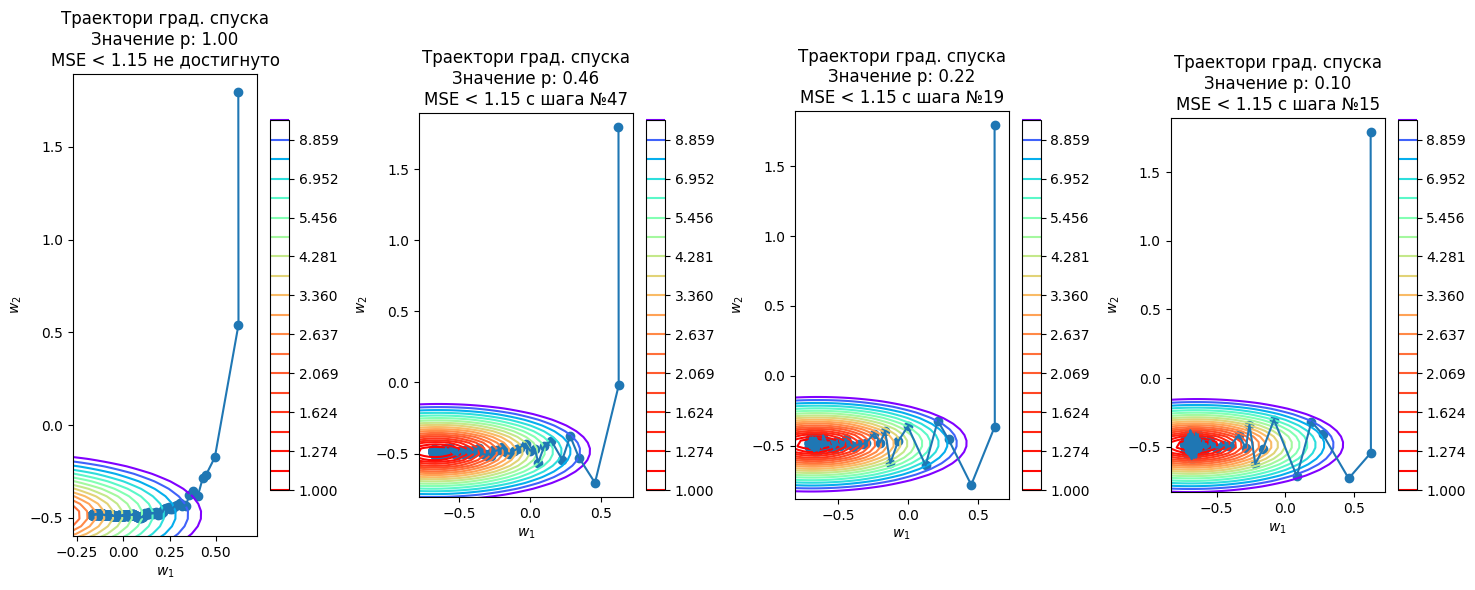

In [119]:
p_options = [10 ** (power / 3) for power in range(0, -4, -1)]

superfig, axs = plt.subplots(1, 4, num=1, figsize=(15, 6))

lr = 0.01
batch_size = 10

for ax, p in zip(axs, p_options):
    ax: Axes
    w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p)
    for i, w in enumerate(w_list):
        if loss.calc_loss(X, y, w) < 1.15: break
    else:
        i = -1
    plot_gd(w_list, X, y, loss, ax=ax)
    ax.set_title(
        ax.get_title()
        + f"\nЗначение p: {p:.2f}"
        + "\nMSE < 1.15" + (f" с шага №{i}" if i != -1 else " не достигнуто")
    )
plt.tight_layout()
plt.show()

> С уменьшением `p` путь становится кривее, но в "яму" модель приходит быстрее

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

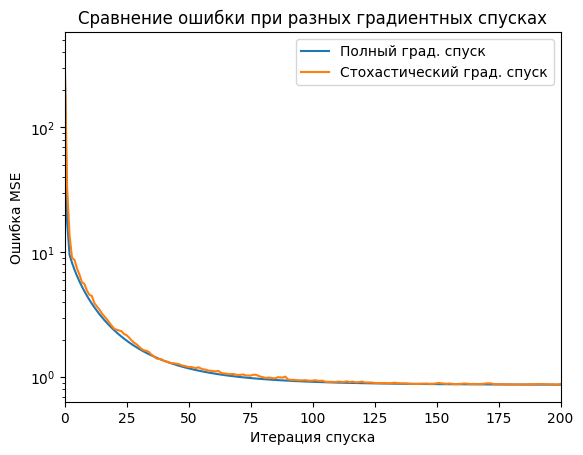

In [121]:
batch_size = 10

full_w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, X.shape[0], p=0.5)
stoch_w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p=0.5)
plt.plot(np.arange(1001), [loss.calc_loss(X, y, w) for w in full_w_list], label = "Полный град. спуск")
plt.plot(np.arange(1001), [loss.calc_loss(X, y, w) for w in stoch_w_list], label = "Стохастический град. спуск")
plt.title("Сравнение ошибки при разных градиентных спусках")
plt.xlim(0, 200)
plt.xlabel("Итерация спуска")
plt.yscale('log')
plt.ylabel("Ошибка MSE")
plt.legend()
plt.show()

> Преимущество SGD не особо видно — полный спуск отличается гладкостью и чуть-чуть опережает стохастический спуск. Это потому, что преимущество SGD заключается не в том, чтобы достигать минимум за меньшее число шагов, а в том, чтобы делать каждый шаг затрачивая на это меньше вычислений и соответственно времени

In [34]:
from time import time

def time_by_batch_size(batch_size: int, iterations: int = 50_000):
    fgd_start = time()
    stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p=0.5, n_iterations=iterations)
    fgd_end = time()
    return fgd_end - fgd_start

print(f"Время на полный спуск: {time_by_batch_size(X.shape[0]):.2f} сек")
print(f"Время на стохастический спуск: {time_by_batch_size(batch_size):.2f} сек")

Время на полный спуск: 3.40 сек
Время на стохастический спуск: 2.90 сек


## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`.

В методе `predict` мы будем применять нашу регрессию к датасету.

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`.

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [97]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    @staticmethod
    def extend_with_ones(X: np.ndarray):
        return np.hstack([X, np.ones([X.shape[0], 1])])

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = self.extend_with_ones(X)

        w_init = np.random.uniform(-2, 2, X.shape[1])
        self.w = gradient_descent(w_init, X, y, self.loss, self.lr)[-1]

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = self.extend_with_ones(X)

        return X @ self.w

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [36]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [37]:
import pandas as pd

X_raw = pd.read_csv(
    "cars_data.csv",
    header=None,
    na_values=["?"],
    skiprows=1,
    index_col=0
)
X_raw = X_raw[~X_raw[26].isna()].reset_index(drop=True)
X_raw.head()

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [38]:
y = X_raw[26]
X_raw = X_raw.drop(26, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [58]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(X_raw, y, random_state=239)
cat_mask = X_raw.dtypes == "object"

imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()
num_cols = X_raw.columns[~cat_mask]
X_train_numeric = scaler.fit_transform(imputer.fit_transform(X_train[num_cols]))
X_test_numeric = scaler.transform(imputer.transform(X_test[num_cols]))

onehotencoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat_cols = X_raw.columns[cat_mask]
X_train_cat = onehotencoder.fit_transform(X_train[cat_cols])
X_test_cat = onehotencoder.transform(X_test[cat_cols])

cols = num_cols.append(pd.Index(onehotencoder.get_feature_names_out()))
X_train = pd.DataFrame(np.hstack([X_train_numeric, X_train_cat]), columns=cols)
X_test = pd.DataFrame(np.hstack([X_test_numeric, X_test_cat]), columns=cols)
print(f"Обуч. выборка: {X_train.shape[0]}")
display(X_train.head())
print(f"Тестовая выборка: {X_test.shape[0]}")
display(X_test.head())

Обуч. выборка: 150


,1,2,10,11,12,13,14,17,19,20,...,x8_three,x8_twelve,x8_two,x9_1bbl,x9_2bbl,x9_4bbl,x9_idi,x9_mpfi,x9_spdi,x9_spfi
0,0.908694,0.000000,-0.397652,0.307001,0.404687,-1.427114,-0.089272,0.260174,0.578388,2.198436,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.715227,0.808668,0.124658,1.119113,0.356964,0.930361,0.605110,-0.040447,0.873057,-0.573642,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.102161,-0.193037,-0.815500,-1.308937,-0.931544,-1.300821,-1.254557,-0.887654,-1.226461,-0.039266,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.102161,0.119996,-0.676217,-0.621128,-0.931544,-0.248377,-0.951263,-0.696349,-0.563455,0.161125,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.908694,-0.067824,-0.188728,-0.115629,-0.120261,0.761970,-0.486347,-0.696349,-1.079127,0.528509,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Тестовая выборка: 51


,1,2,10,11,12,13,14,17,19,20,...,x8_three,x8_twelve,x8_two,x9_1bbl,x9_2bbl,x9_4bbl,x9_idi,x9_mpfi,x9_spdi,x9_spfi
0,0.908694,-0.944316,-0.188728,-0.115629,-0.120261,0.761970,-0.408528,-0.368398,-0.416121,0.528509,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.715227,0.000000,-0.432473,0.008674,0.261519,-1.553408,0.625064,0.916076,1.057225,2.064842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.704372,-0.693890,-0.206138,-0.090769,-0.167983,-0.585159,-0.628017,-0.395727,1.167726,-2.009779,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.715227,0.000000,-0.432473,0.008674,0.261519,-1.553408,0.840561,0.916076,1.057225,2.064842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.704372,0.119996,0.350992,0.713057,0.356964,0.509383,1.177776,1.599307,0.467887,0.094328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [59]:
linear_regression.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [61]:
from sklearn.metrics import mean_squared_error

print(f"MSE на обуч. выборке: {mean_squared_error(y_train, linear_regression.predict(X_train)):_.2f}")
print(f"MSE на тестовой выборке: {mean_squared_error(y_test, linear_regression.predict(X_test)):_.2f}")

MSE на обуч. выборке: 856_851.73
MSE на тестовой выборке: 15_022_257.54


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации.

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`.

Он должен вычислять лосс и градиент по формулам выше.

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`.

In [64]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef
        self.no_l2_loss = MSELoss()

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        return self.no_l2_loss.calc_loss(X, y, w) - self.coef * (w[:-1] ** 2).sum()

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        w_no_bias = w.copy()
        w_no_bias[-1] = 0
        return self.no_l2_loss.calc_grad(X, y, w) + 2 * self.coef * w_no_bias

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [65]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [ ]:
coefs = [10 ** (p/2) for p in range(-2, -8, -1)]

for c in coefs:
    linear_regression = LinearRegression(MSEL2Loss(c))
    linear_regression.fit(X_train, y_train)
    print(f"Коэфф. регуляризации: {c:.4f}")
    print(f"    MSE на обуч. выборке: {mean_squared_error(y_train, linear_regression.predict(X_train)):_.2f}")
    print(f"    MSE на тестовой выборке: {mean_squared_error(y_test, linear_regression.predict(X_test)):_.2f}")

Коэфф. регуляризации: 0.1000
    MSE на обуч. выборке: 3_700_833.85
    MSE на тестовой выборке: 16_982_696.98
Коэфф. регуляризации: 0.0316
    MSE на обуч. выборке: 2_337_420.23
    MSE на тестовой выборке: 14_742_771.81
Коэфф. регуляризации: 0.0100
    MSE на обуч. выборке: 1_469_368.57
    MSE на тестовой выборке: 13_052_691.89
Коэфф. регуляризации: 0.0032
    MSE на обуч. выборке: 1_036_493.02
    MSE на тестовой выборке: 12_639_079.67
Коэфф. регуляризации: 0.0010
    MSE на обуч. выборке: 895_528.56
    MSE на тестовой выборке: 13_314_063.03
Коэфф. регуляризации: 0.0003
    MSE на обуч. выборке: 864_182.64
    MSE на тестовой выборке: 14_124_886.59


> При коэфф. регуляризации 0.0032 MSE на обучающей выборке увеличивается на 200 000, но зато на тестовой выборке MSE уменьшилось на 3 000 000 (на 20%)

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`.

Он должен вычислять лосс и градиент по формулам выше.

In [89]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def __phi(self, z: np.ndarray) -> np.ndarray:
        z = abs(z)
        mask = z < self.eps
        z[mask] = z[mask] ** 2 / 2
        z[~mask] = self.eps * (z[~mask] - self.eps/2)
        return z

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        return self.__phi(X @ w - y).mean()

    def __phi_grad(self, z: np.ndarray) -> np.ndarray:
        mask = abs(z) < self.eps
        z[~mask] = self.eps * np.sign(z[~mask])
        return z

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return (X.T @ self.__phi_grad(X @ w - y)).mean()

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [100]:
eps_options = [0.001, 0.01, 0.05, 0.1, 1, 2, 5]

for eps in eps_options:
    huber_loss = HuberLoss(eps)
    linear_regression = LinearRegression(huber_loss)
    linear_regression.fit(X_train, y_train)
    print(f"ɛ = {eps}")
    print(f"    MSE на обуч. выборке: {mean_squared_error(y_train, linear_regression.predict(X_train)):_.2f}")
    print(f"    MSE на тестовой выборке: {mean_squared_error(y_test, linear_regression.predict(X_test)):_.2f}")

ɛ = 0.001
    MSE на обуч. выборке: 143_350_862.94
    MSE на тестовой выборке: 227_639_986.66
ɛ = 0.01
    MSE на обуч. выборке: 24_153_417.52
    MSE на тестовой выборке: 35_921_624.56
ɛ = 0.05
    MSE на обуч. выборке: 24_139_651.26
    MSE на тестовой выборке: 35_792_279.22
ɛ = 0.1
    MSE на обуч. выборке: 24_143_411.49
    MSE на тестовой выборке: 35_790_887.57
ɛ = 1
    MSE на обуч. выборке: 24_142_611.02
    MSE на тестовой выборке: 35_791_449.19
ɛ = 2
    MSE на обуч. выборке: 24_112_448.48
    MSE на тестовой выборке: 35_743_151.81
ɛ = 5
    MSE на обуч. выборке: 24_127_009.68
    MSE на тестовой выборке: 35_723_225.28


**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2025 в ячейку ниже:

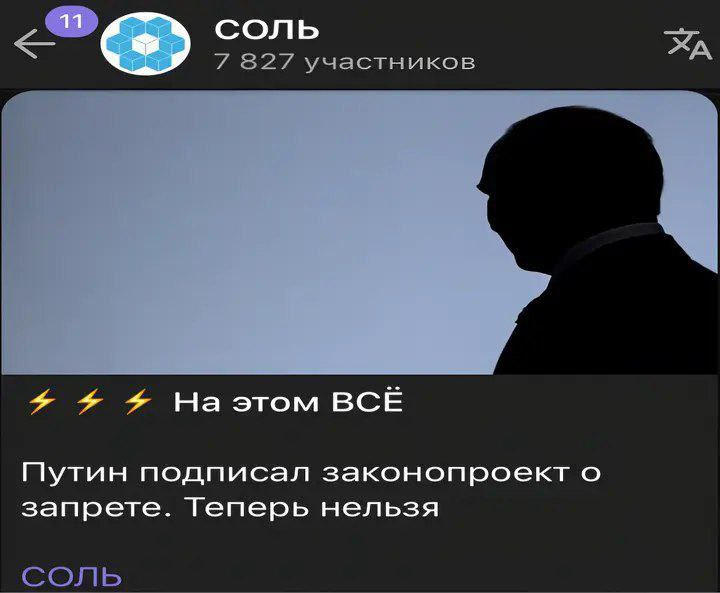

### БОНУС (2 балла)

Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2 балла)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределения с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [ ]:
# -- YOUR CODE HERE -- ʕ•ᴥ•ʔ